<a href="https://colab.research.google.com/github/timidsurgeon/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Christian_Lopez_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

### Importing modules

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Loading dataframe

In [0]:
cancer_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

In [3]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1
34,60,1,1
34,61,10,1
34,67,7,1
34,60,0,1
35,64,13,1
35,63,0,1
36,60,1,1
36,69,0,1
37,60,0,1
37,63,0,1
37,58,0,1
37,59,6,1
37,60,15,1
37,63,0,1
38,69,21,2
38,59,2,1
38,60,0,1
38,60,0,1
38,62,3,1
38,64,1,1
38,66,0,1
38,66,11,1
38,60,1,1
38,67,5,1
39,66,0,2
39,63,0,1
39,67,0,1
39,58,0,1
39,59,2,1
39,63,4,1
40,58,2,1
40,58,0,1
40,65,0,1
41,60,23,2
41,64,0,2
41,67,0,2
41,58,0,1
41,59,8,1
41,59,0,1
41,64,0,1
41,69,8,1
41,65,0,1
41,65,0,1
42,69,1,2
42,59,0,2
42,58,0,1
42,60,1,1
42,59,2,1
42,61,4,1
42,62,20,1
42,65,0,1
42,63,1,1
43,58,52,2
43,59,2,2
43,64,0,2
43,64,0,2
43,63,14,1
43,64,2,1
43,64,3,1
43,60,0,1
43,63,2,1
43,65,0,1
43,66,4,1
44,64,6,2
44,58,9,2
44,63,19,2
44,61,0,1
44,63,1,1
44,61,0,1
44,67,16,1
45,65,6,2
45,66,0,2
45,67,1,2
45,60,0,1
45,67,0,1
45,59,14,1
45,64,0,1
45,68,0,1
45,67,1,1
46,58,2,2
46,69,3,2
46,62,5,2
46,65,20,2
46,62,0,1
46,58,3,1
46,63,0,1
47,63,23,2
47,62,0,2
47,6

In [4]:
df = pd.read_csv(cancer_data_url)
print(df.shape)
df.head()

(305, 4)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
df.count()

30     305
64     305
1      305
1.1    305
dtype: int64

In [6]:
df = pd.read_csv(cancer_data_url, header=None)
print(df.shape)
df.head()

(306, 4)


,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Looking for NaN values

In [7]:
df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
0    306 non-null int64
1    306 non-null int64
2    306 non-null int64
3    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


### Renaming dataframe columns

In [9]:
col_headers = ['age_patient', 'year_op', 'ax_nodes', 'survived']
df = pd.read_csv(cancer_data_url, header=None, names=col_headers)
df.head(20)

,age_patient,year_op,ax_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


### Encoding survival column

In [0]:
df['survived'] = df['survived'].map({1:1, 2:0})

In [13]:
df.survived.value_counts()

1    225
0     81
Name: survived, dtype: int64

### Dataframe header(5)

In [11]:
print(df.head(5))

   age_patient  year_op  ax_nodes  survived
0           30       64         1         1
1           30       62         3         1
2           30       65         0         1
3           31       59         2         1
4           31       65         4         1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

### Crosstabs

#### year_op vs. survived

In [32]:
time_bins = pd.cut(df['year_op'], 3)
pd.crosstab(time_bins, df['survived'])

survived,0,1
year_op,,
"(57.989, 61.667]",28,89
"(61.667, 65.333]",36,76
"(65.333, 69.0]",17,60


In [31]:
# percentages column-wise 
time_bins = pd.cut(df['year_op'], 3)
pd.crosstab(time_bins, df['survived'], normalize='columns')

survived,0,1
year_op,,
"(57.989, 61.667]",0.345679,0.395556
"(61.667, 65.333]",0.444444,0.337778
"(65.333, 69.0]",0.209877,0.266667


In [30]:
# percentages row-wise
time_bins = pd.cut(df['year_op'], 3)
pd.crosstab(time_bins, df['survived'], normalize='index')

survived,0,1
year_op,,
"(57.989, 61.667]",0.239316,0.760684
"(61.667, 65.333]",0.321429,0.678571
"(65.333, 69.0]",0.220779,0.779221


#### age_patient vs. survived

In [27]:
time_bins2 = pd.cut(df['age_patient'], 3)
pd.crosstab(time_bins2, df['survived'])

survived,0,1
age_patient,,
"(29.947, 47.667]",26,81
"(47.667, 65.333]",44,117
"(65.333, 83.0]",11,27


In [28]:
# percentages column-wise 
time_bins2 = pd.cut(df['age_patient'], 3)
pd.crosstab(time_bins2, df['survived'], normalize='columns')

survived,0,1
age_patient,,
"(29.947, 47.667]",0.320988,0.36
"(47.667, 65.333]",0.543210,0.52
"(65.333, 83.0]",0.135802,0.12


In [29]:
# percentages row-wise
time_bins2 = pd.cut(df['age_patient'], 3)
pd.crosstab(time_bins2, df['survived'], normalize='index')

survived,0,1
age_patient,,
"(29.947, 47.667]",0.242991,0.757009
"(47.667, 65.333]",0.273292,0.726708
"(65.333, 83.0]",0.289474,0.710526


#### ax_nodes vs. survived

In [33]:
time_bins3 = pd.cut(df['ax_nodes'], 2)
pd.crosstab(time_bins3, df['survived'])

survived,0,1
ax_nodes,,
"(-0.052, 26.0]",79,222
"(26.0, 52.0]",2,3


In [34]:
# percentages column-wise 
time_bins3 = pd.cut(df['ax_nodes'], 2)
pd.crosstab(time_bins3, df['survived'], normalize='columns')

survived,0,1
ax_nodes,,
"(-0.052, 26.0]",0.975309,0.986667
"(26.0, 52.0]",0.024691,0.013333


In [35]:
# percentages row-wise
time_bins3 = pd.cut(df['ax_nodes'], 2)
pd.crosstab(time_bins3, df['survived'], normalize='index')

survived,0,1
ax_nodes,,
"(-0.052, 26.0]",0.262458,0.737542
"(26.0, 52.0]",0.400000,0.600000


### Visualizations

#### year_op vs. survived

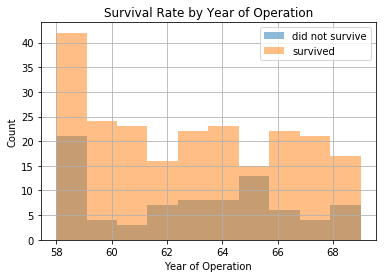

In [64]:
df.groupby('survived').year_op.hist(alpha=0.5)
plt.title('Survival Rate by Year of Operation')
plt.ylabel('Count')
plt.xlabel('Year of Operation')
plt.legend(['did not survive', 'survived'])
plt.show()

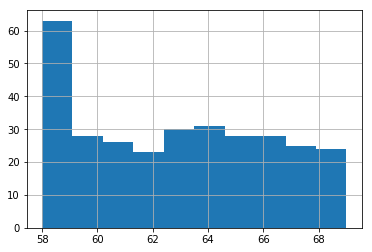

In [69]:
df.year_op.hist();

#### age_patient vs. survived

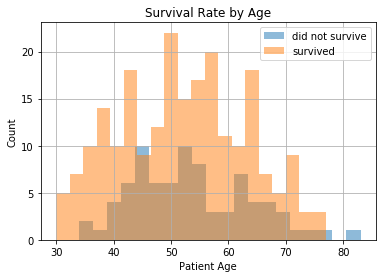

In [65]:
df.groupby('survived').age_patient.hist(bins=20, alpha=0.5)
plt.title('Survival Rate by Age')
plt.ylabel('Count')
plt.xlabel('Patient Age')
plt.legend(['did not survive', 'survived'])
plt.show()

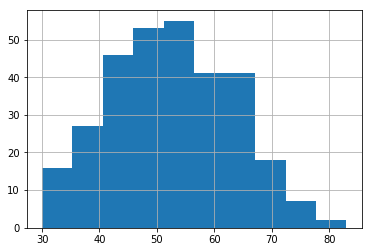

In [70]:
df.age_patient.hist();

#### ax_nodes vs. survived

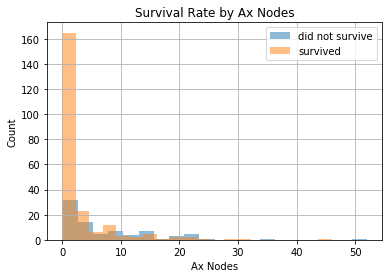

In [66]:
df.groupby('survived').ax_nodes.hist(bins=20, alpha=0.5)
plt.title('Survival Rate by Ax Nodes')
plt.ylabel('Count')
plt.xlabel('Ax Nodes')
plt.legend(['did not survive', 'survived'])
plt.show()

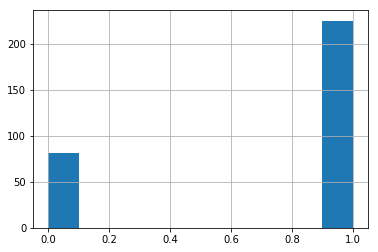

In [71]:
df.survived.hist();

#### df.plot.hist

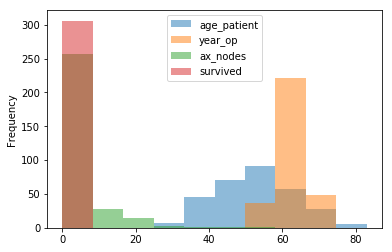

In [68]:
df.plot.hist(alpha=0.5);

#### plt.scatter (age_patient vs. ax_nodes)

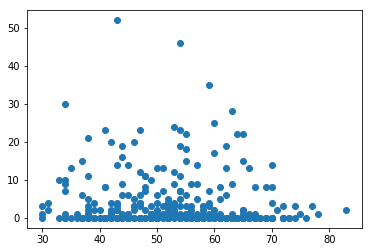

In [55]:
plt.scatter(df.age_patient, df.ax_nodes);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

One feature that looks to have a positive relationship with survival is the age of the patient. 

- What is at least one feature that looks to have a negative relationship with survival?

One feature that looks to have a negative relationship is the number of ax nodes. 

- How are those two features related with each other, and what might that mean?

These two features might be related to each other in the sense that as the age of the patient increases, so do the potential number of ax nodes. The number of ax nodes are, in turn, directly related to whether that person will eventually survive or die. This means that we should be aware and take precautions earlier rather than later, and get checked out before the number of ax nodes propagate and our chances of survival are dramatically reduced. 